### Importación de datos



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configuramos el estilo de seaborn para matplotlib
plt.style.use('seaborn-v0_8-whitegrid')

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# 0. Agregar identificadores a los data frames
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# 1. Combinar los DataFrames en uno solo
df_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# 2. Sumar los precios por tienda
ingresos_por_tienda = df_tiendas.groupby('Tienda')['Precio'].sum().reset_index()
ingresos_por_tienda = ingresos_por_tienda.sort_values('Precio', ascending=False)

print("Ingresos totales por tienda:")
print(ingresos_por_tienda)

Ingresos totales por tienda:
     Tienda        Precio
0  Tienda 1  1.150880e+09
1  Tienda 2  1.116344e+09
2  Tienda 3  1.098020e+09
3  Tienda 4  1.038376e+09


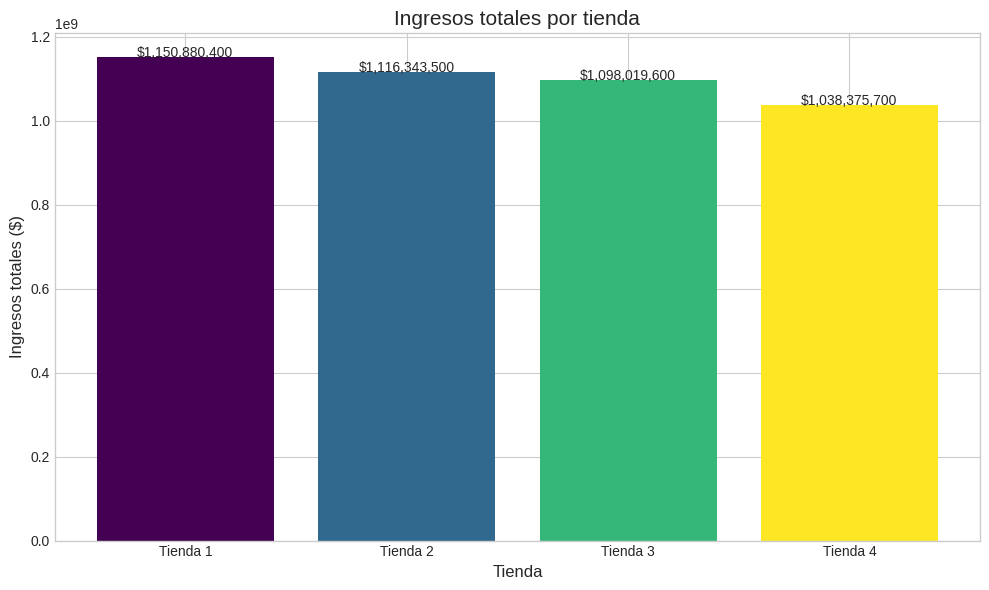

In [3]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# 3. Crear una gráfica de barras

plt.figure(figsize=(10, 6)) # Tamaño (ancho, alto)

# Gráfico de barras
bars = plt.bar(ingresos_por_tienda['Tienda'],
               ingresos_por_tienda['Precio'],
               color=plt.cm.viridis(np.linspace(0, 1, len(ingresos_por_tienda))))

# Añadiendo etiquetas y título
plt.title('Ingresos totales por tienda', fontsize=15)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Ingresos totales ($)', fontsize=12)

# Añadir los valores en las barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
            f'${height:,.0f}', ha='center', fontsize=10)

# Ajustar espacios automáticamente
plt.tight_layout()

# Mostrar la gráfica
plt.show()

# 2. Ventas por categoría

In [4]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# 1. Sumar los precios por tienda y categoría
cantidad_por_tienda_categoria = df_tiendas.groupby(['Tienda', 'Categoría del Producto']).size().reset_index(name='Cantidad')

print("Cantidad de productos por tienda y categoría:")
print(cantidad_por_tienda_categoria)

Cantidad de productos por tienda y categoría:
      Tienda   Categoría del Producto  Cantidad
0   Tienda 1  Artículos para el hogar       171
1   Tienda 1     Deportes y diversión       284
2   Tienda 1        Electrodomésticos       312
3   Tienda 1             Electrónicos       448
4   Tienda 1   Instrumentos musicales       182
5   Tienda 1                 Juguetes       324
6   Tienda 1                   Libros       173
7   Tienda 1                  Muebles       465
8   Tienda 2  Artículos para el hogar       181
9   Tienda 2     Deportes y diversión       275
10  Tienda 2        Electrodomésticos       305
11  Tienda 2             Electrónicos       422
12  Tienda 2   Instrumentos musicales       224
13  Tienda 2                 Juguetes       313
14  Tienda 2                   Libros       197
15  Tienda 2                  Muebles       442
16  Tienda 3  Artículos para el hogar       177
17  Tienda 3     Deportes y diversión       277
18  Tienda 3        Electrodomésticos     

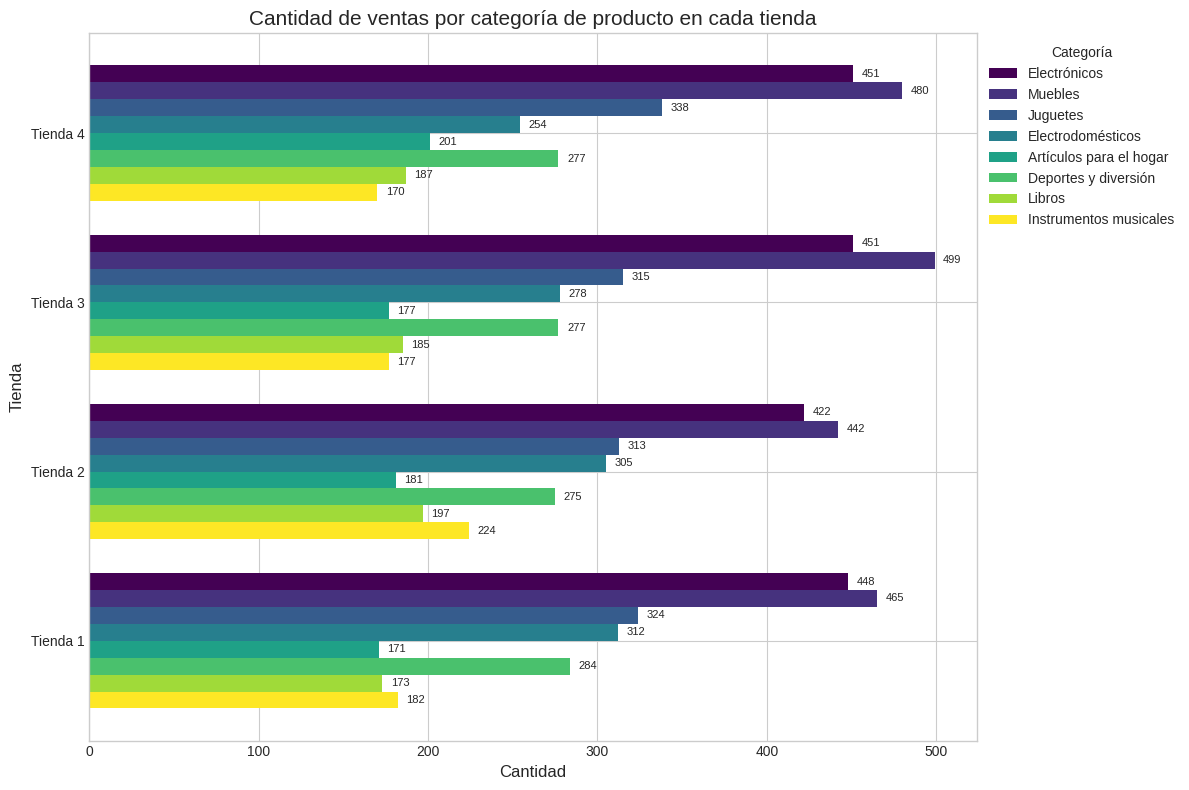

In [5]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# 2. Crear una gráfica de barras horizontales

# Preparando los datos para la gráfica
tiendas = df_tiendas['Tienda'].unique()
categorias = df_tiendas['Categoría del Producto'].unique()

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Calcular el ancho de las barras y las posiciones
n_categorias = len(categorias)
bar_height = 0.8 / n_categorias
y = np.arange(len(tiendas))

# Colores para las categorías
colores = plt.cm.viridis(np.linspace(0, 1, n_categorias))

# Para almacenar las barras para la leyenda
barras = []

# Dibujar las barras para cada categoría
for i, categoria in enumerate(categorias):
    # Filtrar datos para esta categoría
    datos_categoria = cantidad_por_tienda_categoria[cantidad_por_tienda_categoria['Categoría del Producto'] == categoria]

    # Organizar datos por tienda en el mismo orden que tiendas
    valores = []
    for tienda in tiendas:
        valor = datos_categoria[datos_categoria['Tienda'] == tienda]['Cantidad'].values
        valores.append(valor[0] if len(valor) > 0 else 0)

    # Posición de las barras
    posicion = y - i * bar_height

    # Dibujar barra horizontal
    barra = ax.barh(posicion, valores, bar_height, color=colores[i], label=categoria)
    barras.append(barra)

    # Añadir valores al final de las barras
    for j, valor in enumerate(valores):
        if valor > 0:  # Solo mostrar etiquetas para valores positivos
            ax.text(valor + 5, posicion[j], f'{valor:,.0f}',
                    va='center', fontsize=8)

# Configurar el eje Y
ax.set_yticks(y - bar_height * (n_categorias - 1) / 2)
ax.set_yticklabels(tiendas)

# Añadir etiquetas y título
ax.set_title('Cantidad de ventas por categoría de producto en cada tienda', fontsize=15)
ax.set_ylabel('Tienda', fontsize=12)
ax.set_xlabel('Cantidad', fontsize=12)

# Añadir leyenda
ax.legend(title='Categoría', loc='upper left', bbox_to_anchor=(1, 1))

# Ajustar espacios automáticamente
plt.tight_layout()

# Mostrar gráfico
plt.show()

# 3. Calificación promedio de la tienda


In [6]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# 1. Calcular promedio de calificaciones por tienda
calificacion_promedio_por_tienda = df_tiendas.groupby('Tienda')['Calificación'].mean().reset_index()

print("Calificación promedio por tienda:")
print(calificacion_promedio_por_tienda)


Calificación promedio por tienda:
     Tienda  Calificación
0  Tienda 1      3.976685
1  Tienda 2      4.037304
2  Tienda 3      4.048326
3  Tienda 4      3.995759


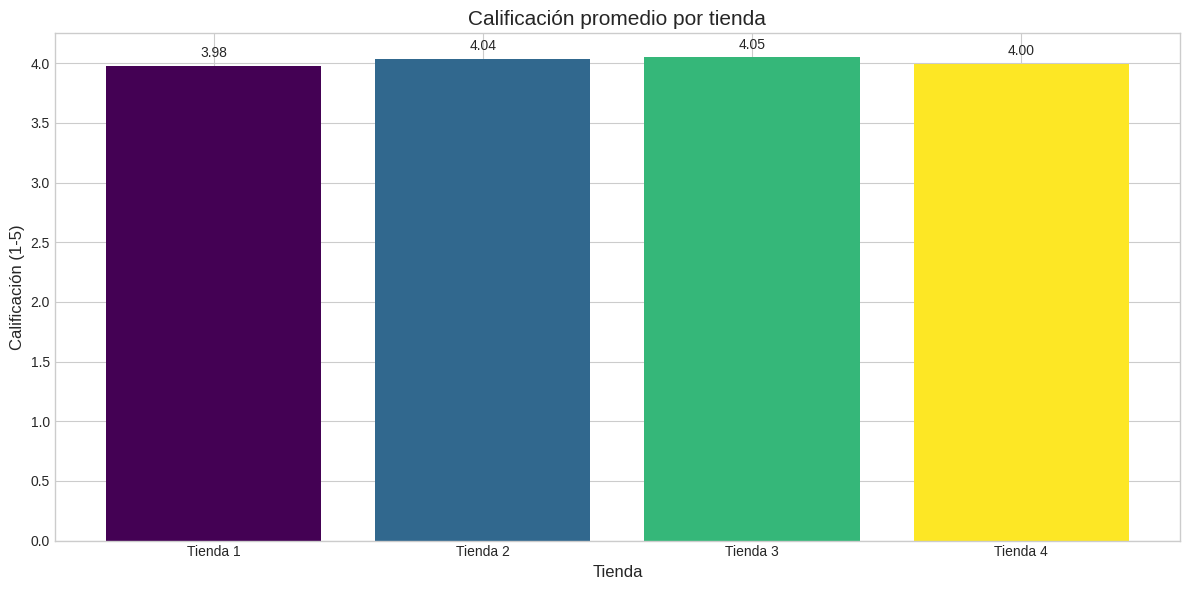

In [7]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# 2. Crear una gráfica de barras

plt.figure(figsize=(12, 6)) # Tamaño (ancho, alto)

# Gráfico de barras
bars = plt.bar(calificacion_promedio_por_tienda['Tienda'],
               calificacion_promedio_por_tienda['Calificación'],
               color=plt.cm.viridis(np.linspace(0, 1, len(calificacion_promedio_por_tienda))))

# Añadiendo etiquetas y título
plt.title('Calificación promedio por tienda', fontsize=15)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Calificación (1-5)', fontsize=12)

# Añadir los valores en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.05,  # Pequeño espacio arriba de la barra
        f'{height:.2f}',  # 2 decimales
        ha='center',
        va='bottom',
        fontsize=10
    )

# Ajustar espacios automáticamente
plt.tight_layout()

# Mostrar la gráfica
plt.show()

# 4. Productos más y menos vendidos

In [19]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# 1. Función para identificar categorías extremas (pueden repetirse)
def encontrar_categorias_extremas(df, extremo='max'):
    if extremo == 'max':
        valor = df['Cantidad'].max()
    else:
        valor = df['Cantidad'].min()

    categorias = df[df['Cantidad'] == valor]['Categoría del Producto'].tolist()
    return categorias, valor

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# 2. Se determinan los extremos
extremos_por_tienda = []
for tienda in cantidad_por_tienda_categoria['Tienda'].unique():
    df_tienda = cantidad_por_tienda_categoria[cantidad_por_tienda_categoria['Tienda'] == tienda]

    # Categorías con MAYOR cantidad (pueden ser varias si hay empate)
    categorias_mayor, cantidad_mayor = encontrar_categorias_extremas(df_tienda, extremo='max')

    # Categorías con MENOR cantidad (pueden ser varias si hay empate)
    categorias_menor, cantidad_menor = encontrar_categorias_extremas(df_tienda, extremo='min')

    extremos_por_tienda.append({
        'Tienda': tienda,
        'Categorías Mayor': "\n".join(categorias_mayor),  # Une múltiples categorías con saltos de linea
        'Cantidad Mayor': cantidad_mayor,
        'Categorías Menor': "\n".join(categorias_menor),
        'Cantidad Menor': cantidad_menor
    })

df_extremos_por_tienda = pd.DataFrame(extremos_por_tienda)

print("Extremos por tienda:")
print(df_extremos_por_tienda)

Extremos por tienda:
     Tienda Categorías Mayor  Cantidad Mayor  \
0  Tienda 1          Muebles             465   
1  Tienda 2          Muebles             442   
2  Tienda 3          Muebles             499   
3  Tienda 4          Muebles             480   

                                  Categorías Menor  Cantidad Menor  
0                          Artículos para el hogar             171  
1                          Artículos para el hogar             181  
2  Artículos para el hogar\nInstrumentos musicales             177  
3                           Instrumentos musicales             170  


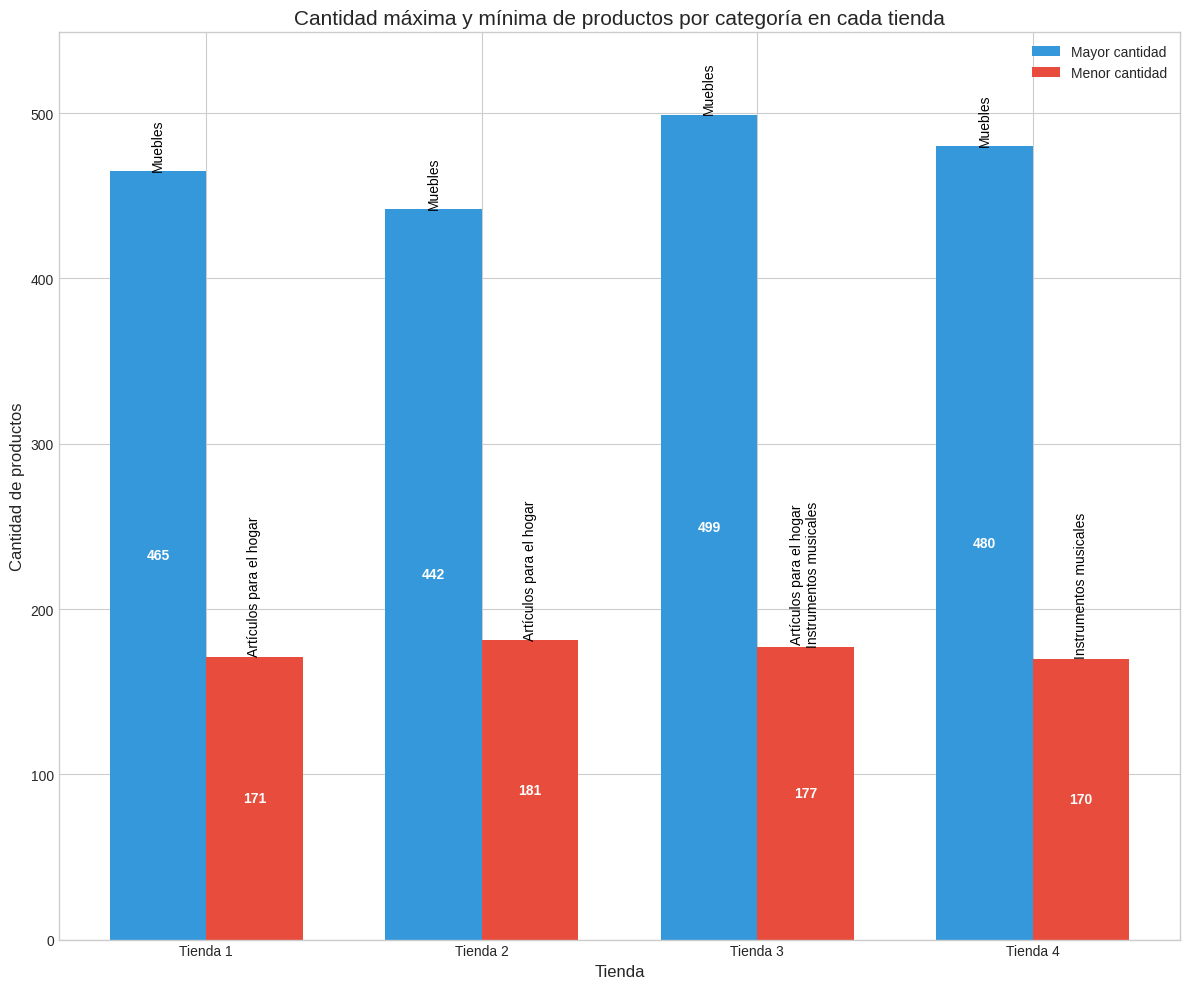

In [25]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# 3. Gráfico de barras

# Preparamos los datos para el gráfico
tiendas = df_extremos_por_tienda['Tienda'].tolist()
cantidades_mayor = df_extremos_por_tienda['Cantidad Mayor'].tolist()
cantidades_menor = df_extremos_por_tienda['Cantidad Menor'].tolist()
categorias_mayor = df_extremos_por_tienda['Categorías Mayor'].tolist()
categorias_menor = df_extremos_por_tienda['Categorías Menor'].tolist()

# Crear figura y ejes - aumentamos un poco la altura para dar espacio a las etiquetas verticales
fig, ax = plt.subplots(figsize=(12, 10))

# Definir posiciones de las barras
x = np.arange(len(tiendas))
width = 0.35  # ancho de las barras

# Crear las barras
bars1 = ax.bar(x - width/2, cantidades_mayor, width, label='Mayor cantidad', color='#3498db')
bars2 = ax.bar(x + width/2, cantidades_menor, width, label='Menor cantidad', color='#e74c3c')

# Añadir etiquetas, título y leyenda
ax.set_xlabel('Tienda', fontsize=12)
ax.set_ylabel('Cantidad de productos', fontsize=12)
ax.set_title('Cantidad máxima y mínima de productos por categoría en cada tienda', fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(tiendas)
ax.legend()

# Añadir las etiquetas de valores y categorías sobre las barras
def add_labels(bars, categorias):
    for i, (bar, categoria) in enumerate(zip(bars, categorias)):
        height = bar.get_height()

        # Valor numérico (dentro de la barra)
        ax.text(bar.get_x() + bar.get_width()/2., height/2,
                f'{int(height)}', ha='center', va='center',
                fontsize=10, color='white', fontweight='bold')

        # Nombre de la categoría (arriba de la barra, completo y en vertical)
        categoria_formateada = categoria
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.3,
                categoria_formateada, ha='center', va='bottom',
                fontsize=10, color='black', rotation=90)

# Añadir las etiquetas a las barras
add_labels(bars1, categorias_mayor)
add_labels(bars2, categorias_menor)

# Ajustar los ejes para que se vean bien las etiquetas de categorías verticales
# Aumentamos el espacio superior para las etiquetas de categoría
plt.ylim(0, max(cantidades_mayor) * 1.1)  # 10% de espacio adicional arriba

# Mejorar la presentación
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# 5. Envío promedio por tienda

In [27]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# 1. Calcular promedio de costos de envío por tienda
envio_promedio_por_tienda = df_tiendas.groupby('Tienda')['Costo de envío'].mean().reset_index()

print("Costos de envío promedio por tienda:")
print(envio_promedio_por_tienda)

Costos de envío promedio por tienda:
     Tienda  Costo de envío
0  Tienda 1    26018.609580
1  Tienda 2    25216.235693
2  Tienda 3    24805.680373
3  Tienda 4    23459.457167


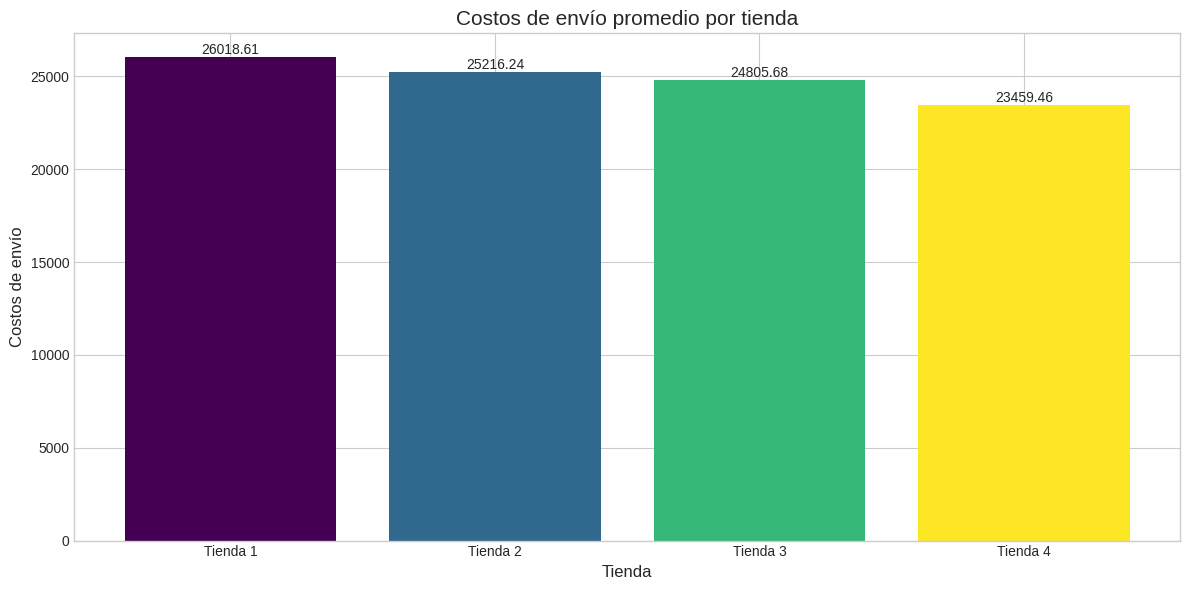

In [28]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# 2. Crear una gráfica de barras

plt.figure(figsize=(12, 6)) # Tamaño (ancho, alto)

# Gráfico de barras
bars = plt.bar(envio_promedio_por_tienda['Tienda'],
               envio_promedio_por_tienda['Costo de envío'],
               color=plt.cm.viridis(np.linspace(0, 1, len(envio_promedio_por_tienda))))

# Añadiendo etiquetas y título
plt.title('Costos de envío promedio por tienda', fontsize=15)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Costos de envío', fontsize=12)

# Añadir los valores en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.05,  # Pequeño espacio arriba de la barra
        f'{height:.2f}',  # 2 decimales
        ha='center',
        va='bottom',
        fontsize=10
    )

# Ajustar espacios automáticamente
plt.tight_layout()

# Mostrar la gráfica
plt.show()

# 6. Informe final

### Introducción

Este informe tiene como objetivo exponer los resultados obtenidos al analizar los rendimientos de las cuatro tiendas del Sr. Juan y así recomendar la tienda que se debería vender.

### Desarrollo

Se presentan los resultados obtenidos en base a los criterios considerados

#### 1. Ingresos totales por tienda

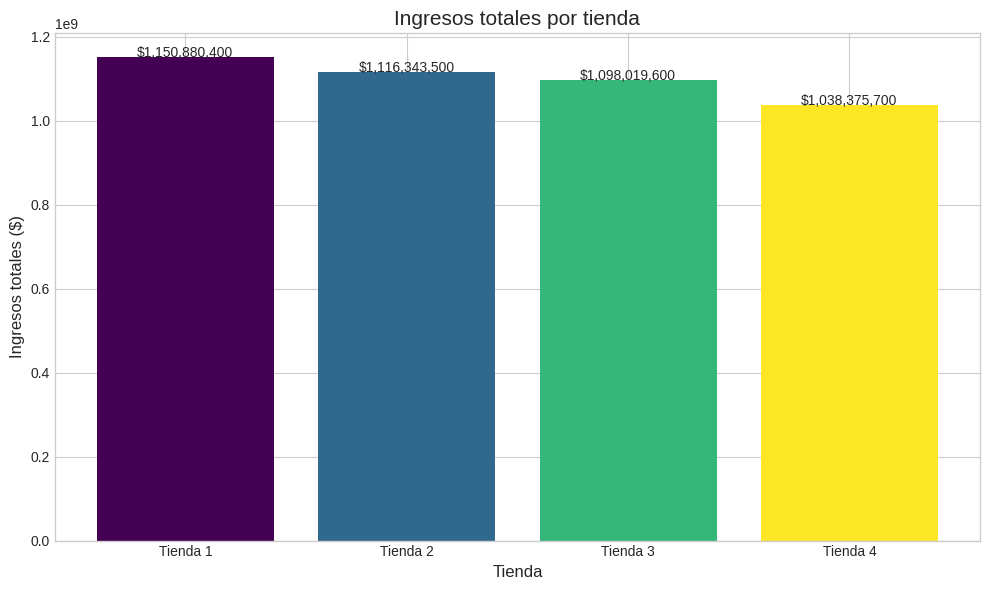

El gráfico de ingresos totales claramente indica que Tienda 4 genera los ingresos totales más bajos, situándose en aproximadamente $1,038,375,700. Esto la posiciona como la tienda con menor rendimiento económico en términos de facturación bruta. Las otras tiendas (Tienda 1, Tienda 2 y Tienda 3) superan significativamente a Tienda 4 en este aspecto.

#### 2. Cantidad de ventas por categoría de producto en cada tienda

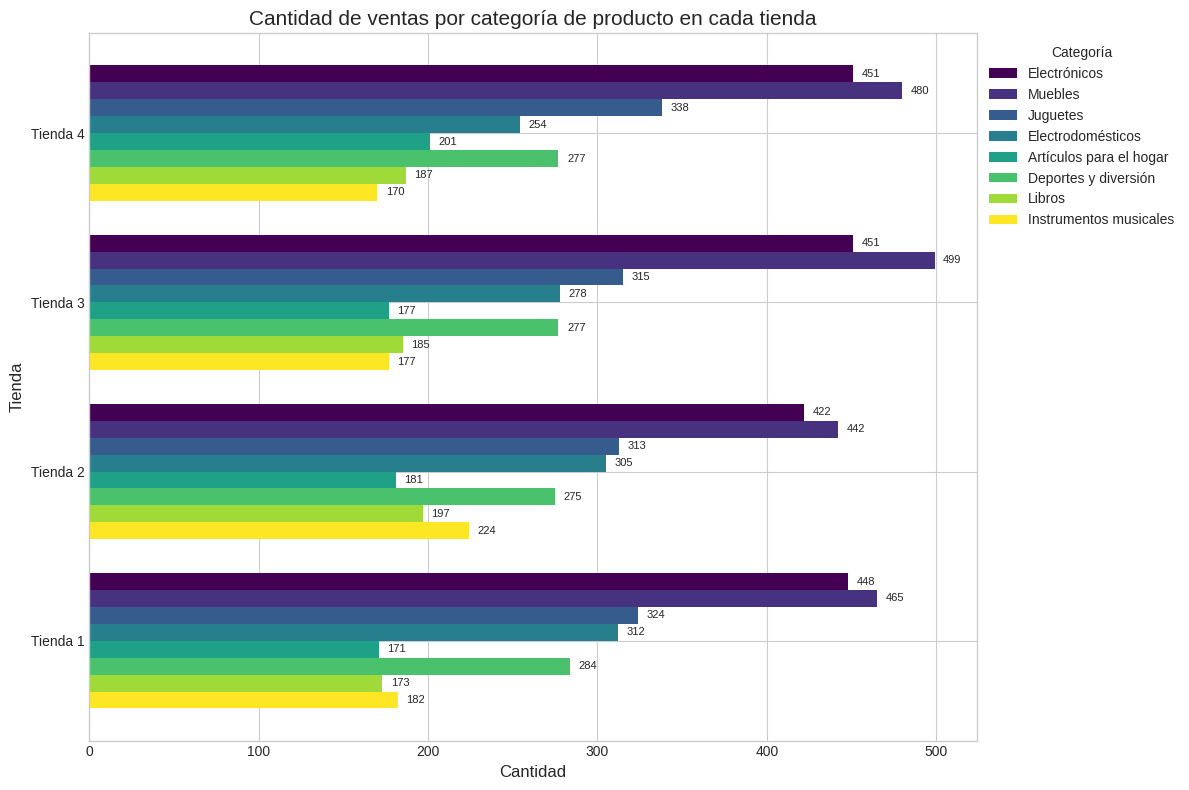

 No se identifica una diferencia drástica en la variedad de categorías vendidas entre las tiendas. Sin embargo, las cantidades generales de venta parecen ser consistentemente más bajas para varias categorías en Tienda 4 en comparación con las otras tiendas. Por ejemplo, las barras que representan las ventas en Tienda 4 tienden a ser más cortas en muchas de las categorías.

#### 3. Calificación promedio por tienda

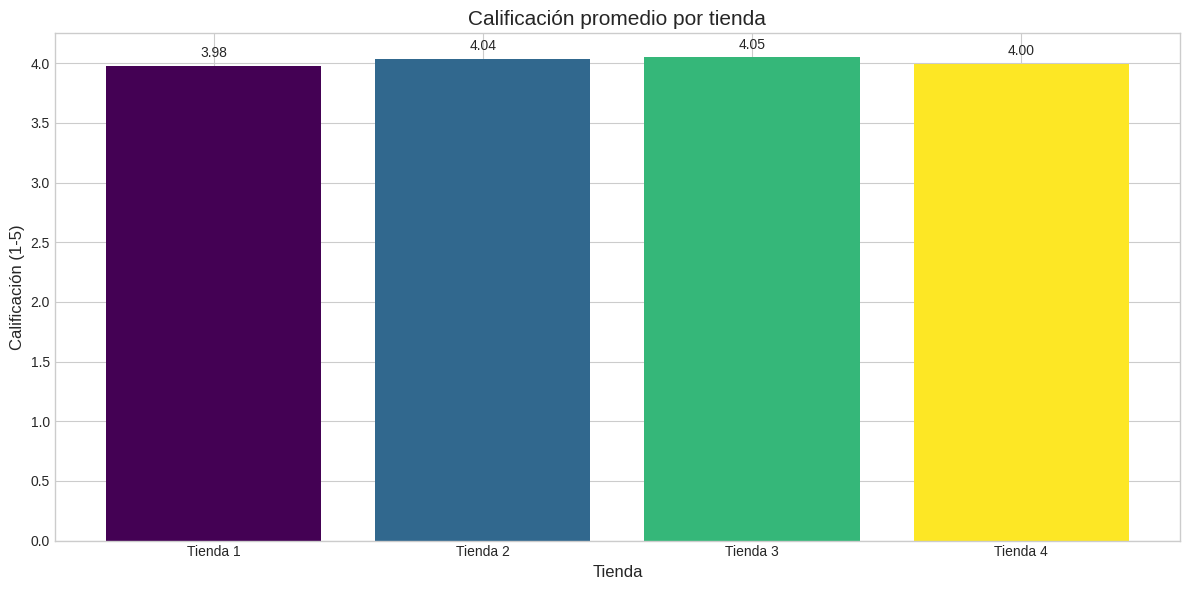

La calificación promedio de los clientes para Tienda 4 es de 4.00, lo cual no es significativamente inferior a las otras tiendas (Tienda 1: 3.98, Tienda 2: 4.04, Tienda 3: 4.05). Esto sugiere que, si bien los ingresos son menores, la satisfacción del cliente no es el principal problema de esta tienda.

#### 4. Cantidad máxima y mínima de productos por categoría en cada tienda

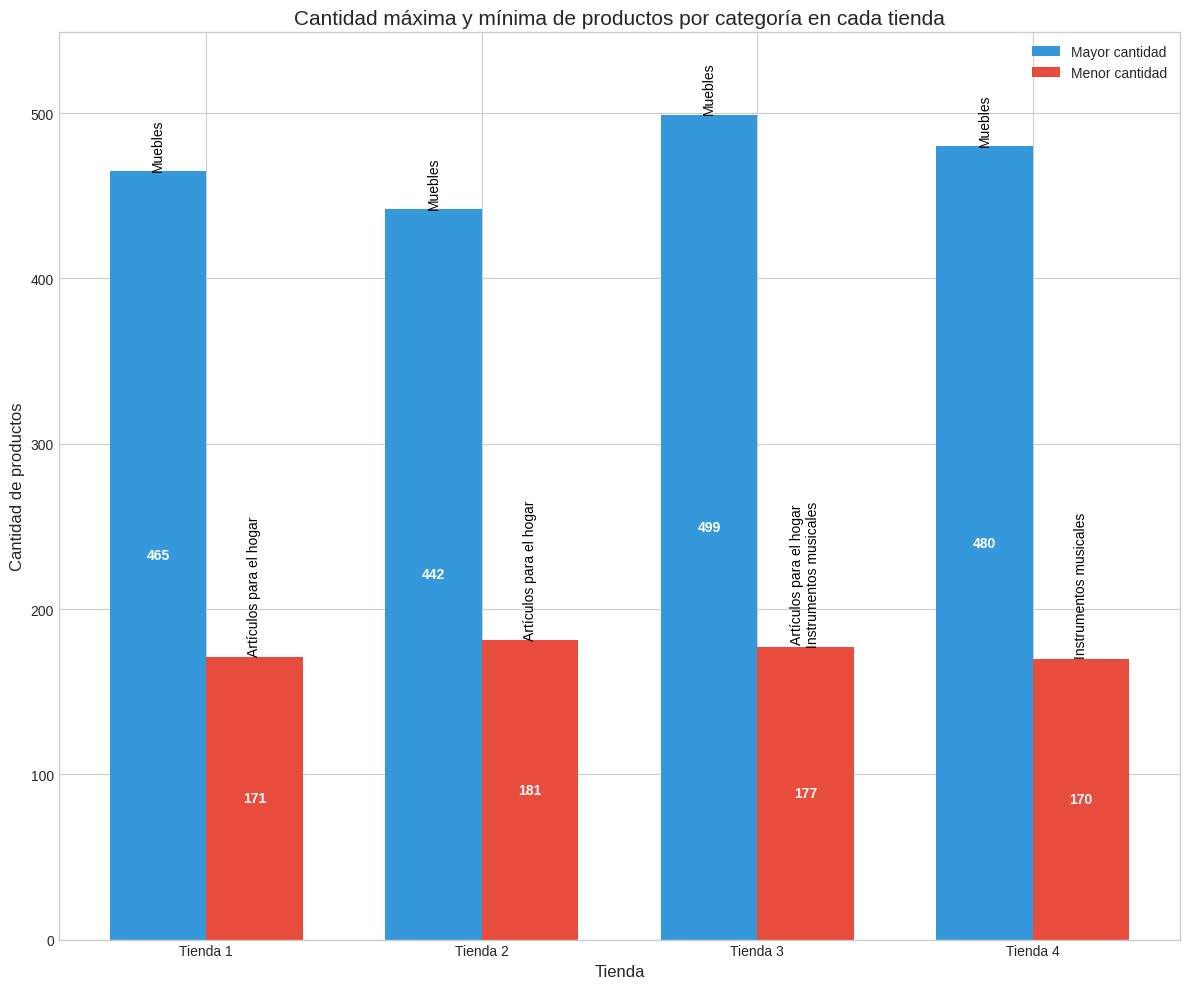

Este gráfico destaca las categorías de productos con la mayor y menor cantidad disponible en cada tienda:

- La categoría con mayor cantidad de productos disponibles suele ser Muebles en todas las tiendas.
- Las categorías con menor cantidad varían, incluyendo Artículos para el hogar en Tienda 1, Tienda 2 y Tienda 3, e Instrumentos musicales en Tienda 4.
- La Tienda 4 tiene la menor cantidad en la categoría "Instrumentos musicales" (170), que es la menor cantidad mínima identificada entre todas las tiendas. Si bien esto es específico de una categoría, podría indicar una gestión de inventario o una demanda particularmente baja en ciertos nichos dentro de Tienda 4.

#### 5. Costos de envío promedio por tienda

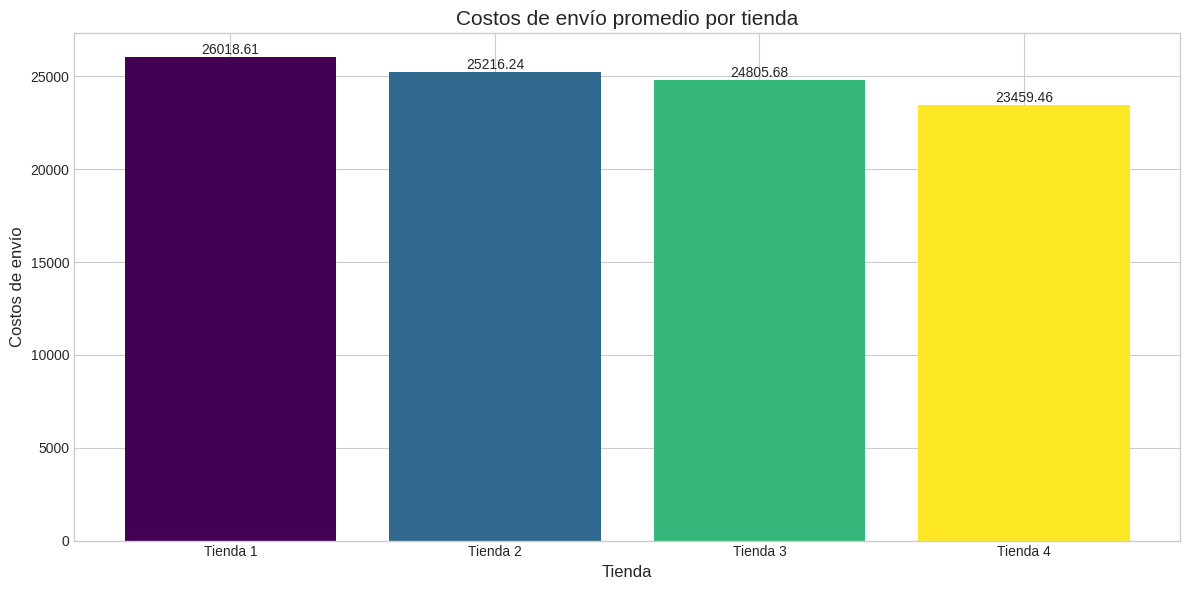

Los costos de envío promedio muestran cierta variación entre las tiendas. Tienda 1 tiene el costo de envío promedio más alto con $25,018.61, seguida de Tienda 2 con $25,216.24 y Tienda 3 con $24,805.68. La Tienda 4 presenta el costo de envío promedio más bajo con $23,459.46.

### Conclusiones y recomendaciones

Basándonos en el análisis de los datos presentados, se recomienda considerar la venta de Tienda 4 para que el Sr. Juan inicie su nuevo emprendimiento.

#### Justificación:

- Ingresos totales: Tienda 4 genera consistentemente los ingresos totales más bajos en comparación con las otras tres tiendas.
- Cantidad de ventas por categoría: Si bien no es drástico, las cantidades de venta en varias categorías parecen ser inferiores en Tienda 4, lo que puede contribuir a que sus ingresos generales sean los menores.
- Calificación promedio: La calificación promedio relativamente alta indica que el problema principal de Tienda 4 no radica en la insatisfacción del cliente, con lo cual pueden ser otros factores.
- Costos de envío: El costo de envío más bajo no es suficiente para compensar la significativa diferencia en los ingresos y podría incluso señalar un menor volumen de actividad general.

#### Debilidades de Tienda 4:

Ingresos totales significativamente más bajos.
Tendencia a menores cantidades de venta en diversas categorías.

#### Fortalezas de Tienda 4:

Calificación promedio de clientes similar a las otras tiendas.
Costo de envío promedio más bajo (aunque esto no se traduce en mayores ventas).

En conclusión, la marcada diferencia en los ingresos totales posiciona a Tienda 4 como la candidata menos eficiente dentro de la cadena Alura Store. Vender esta tienda permitiría al Sr. Juan liberar recursos y capital para su nuevo emprendimiento, dado que su rendimiento económico es el más bajo en comparación con las demás.